To create a prediction model for the profit of 50 startups, we can use multiple linear regression. Before building the model, it's important to preprocess the data and perform transformations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
data=pd.read_csv('/content/50_Startups.csv')

In [ ]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
data


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


Splitting data into IV or DV

In [ ]:
x=data.iloc[:,[0,1,2,4,5]].values

In [ ]:
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00,
        0.00

In [ ]:
x.shape

(50, 5)

In [ ]:
x.ndim

2

In [ ]:
y=data.iloc[:,3].values

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
y.shape
y.ndim

1

Split dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


In [ ]:
x_train.shape


(40, 5)

In [ ]:
y_train.shape


(40,)

Fit Multiple linear regression to training dataset

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.intercept_

54028.03959364577

In [ ]:
reg.score(x_test,y_test)

0.8987266414328638

Predicting on test dataset

In [ ]:
y_predict=reg.predict(x_test)
print(y_predict)

[126362.87908255  84608.45383634  99677.49425147  46357.46068582
 128750.48288504  50912.4174188  109741.35032702 100643.24281647
  97599.27574594 113097.42524432]


**Comparing Between Actual and Predict Profit**

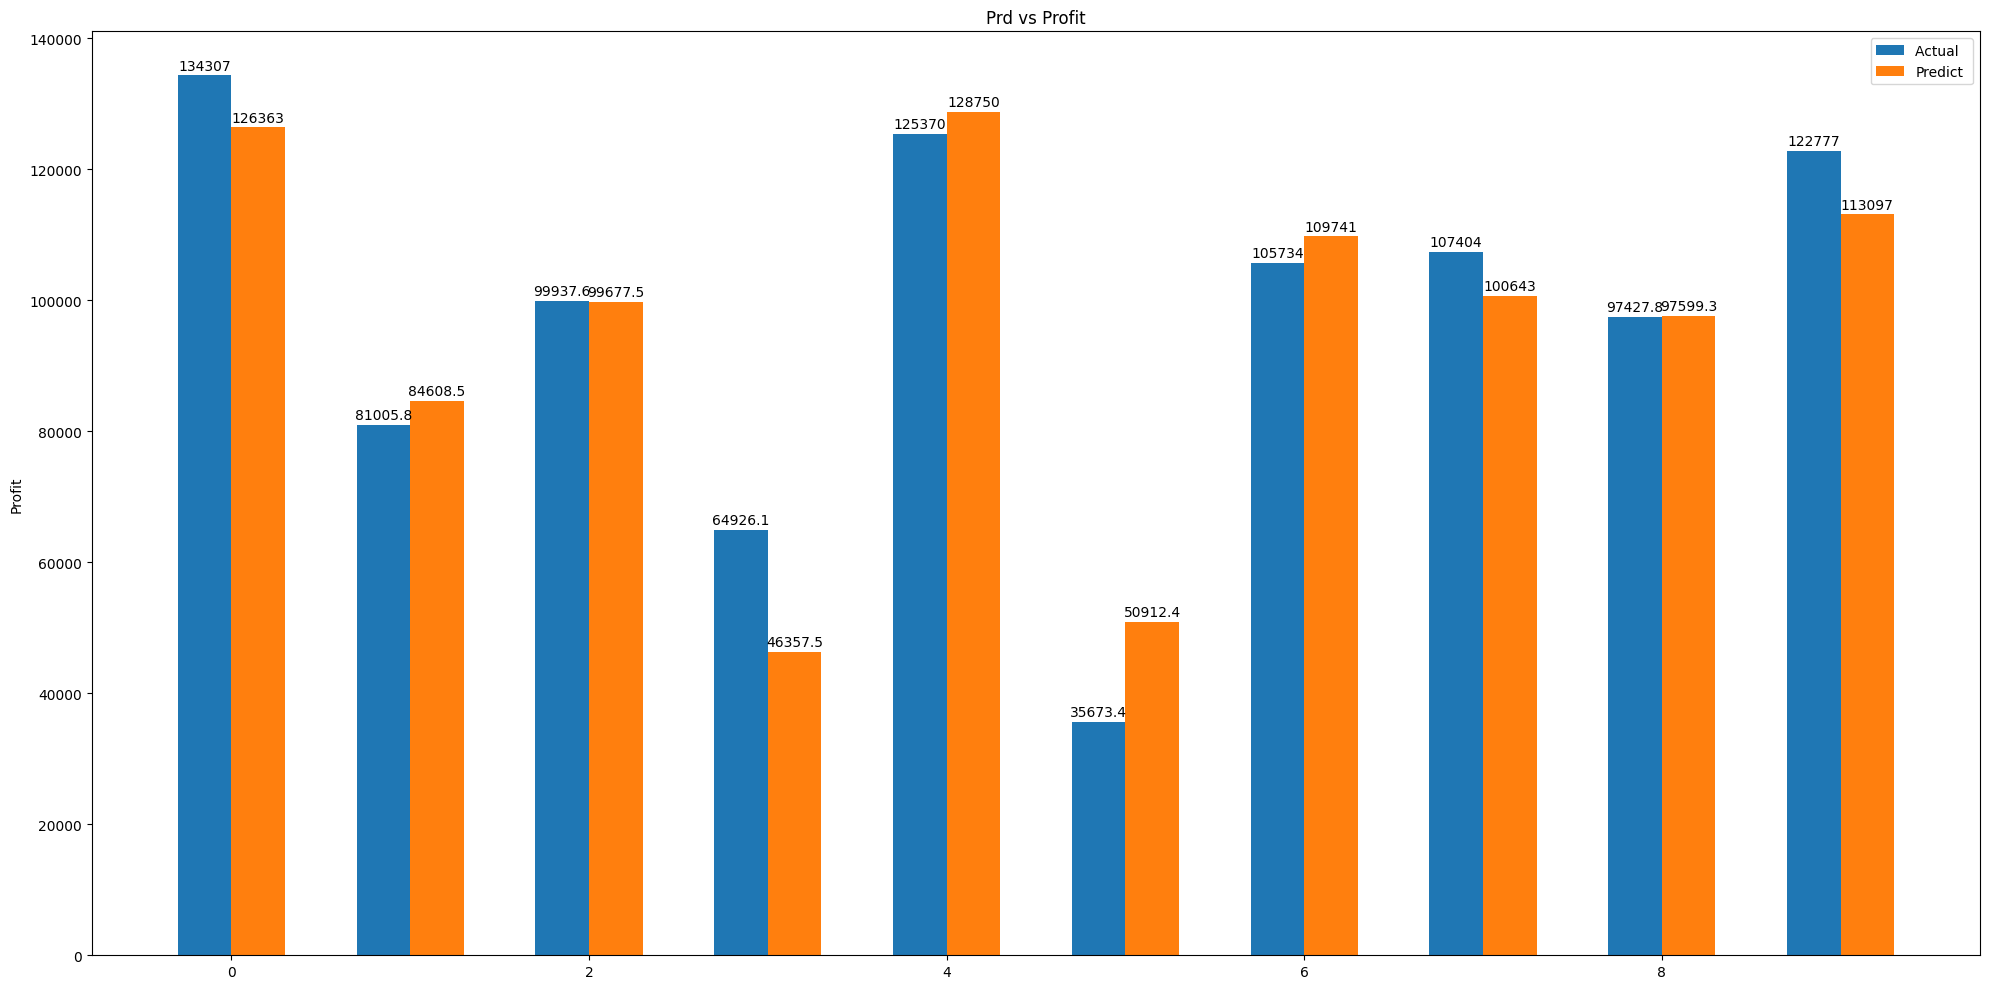

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(len(y_test))
width=.3

fig,ax=plt.subplots(figsize=(20,10))
rects1=ax.bar(x-width/2,y_test,width,label="Actual  ")
rects2=ax.bar(x+width/2,y_predict,width,label="Predict")

ax.set_ylabel("Profit")
ax.set_title("Prd vs Profit")

ax.legend()

ax.bar_label(rects1,padding=2)
ax.bar_label(rects2,padding=2)


fig.tight_layout()
plt.show()

*Inference :**

 The predicted value is close to the actual values i.e the one present in the testing set, Hence we can use this model for prediction.